# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Paramaters for query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = api_key

# Build partial query URL - without city
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []

# set up a counter to print out
counter = 0

# print the start of the API call
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the list of cities and retrieve data on cloudiness, country, 
# date, humidity, lat, lng , Max Temperature, and Wind Speed
for city in cities:
    try:
        counter += 1
        print(f"Processing Record {counter} | {city}")
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
    except:
        print("-----Error: Data not found...Skip-----")
        
print("------------------------")        
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------
Processing Record 1 | rungata
-----Error: Data not found...Skip-----
Processing Record 2 | vaini
Processing Record 3 | punta arenas
Processing Record 4 | oktyabrskoye
Processing Record 5 | sucua
Processing Record 6 | rikitea
Processing Record 7 | la ronge
Processing Record 8 | ushuaia
Processing Record 9 | asosa
Processing Record 10 | tsihombe
-----Error: Data not found...Skip-----
Processing Record 11 | namibe
Processing Record 12 | qaanaaq
Processing Record 13 | sentyabrskiy
-----Error: Data not found...Skip-----
Processing Record 14 | grand river south east
-----Error: Data not found...Skip-----
Processing Record 15 | new norfolk
Processing Record 16 | labuhan
Processing Record 17 | henties bay
Processing Record 18 | majene
Processing Record 19 | hobart
Processing Record 20 | tambilil
Processing Record 21 | tecpan
Processing Record 22 | chitose
Processing Record 23 | nizhneyansk
-----Error: Data not found...Skip-----
Processing Recor

Processing Record 215 | katsuura
Processing Record 216 | tartus
-----Error: Data not found...Skip-----
Processing Record 217 | okha
Processing Record 218 | obo
Processing Record 219 | gaoua
Processing Record 220 | quatre cocos
Processing Record 221 | baykit
Processing Record 222 | viedma
Processing Record 223 | kindersley
Processing Record 224 | montepuez
Processing Record 225 | santa ines
Processing Record 226 | te anau
Processing Record 227 | governador valadares
Processing Record 228 | jieshi
Processing Record 229 | roesti
Processing Record 230 | ambilobe
Processing Record 231 | alofi
Processing Record 232 | karmana
-----Error: Data not found...Skip-----
Processing Record 233 | muros
Processing Record 234 | viborg
Processing Record 235 | salamiyah
Processing Record 236 | arawa
Processing Record 237 | loubomo
-----Error: Data not found...Skip-----
Processing Record 238 | pangai
Processing Record 239 | portlethen
Processing Record 240 | mys shmidta
-----Error: Data not found...Skip---

Processing Record 437 | loandjili
Processing Record 438 | solovetskiy
-----Error: Data not found...Skip-----
Processing Record 439 | bokoro
-----Error: Data not found...Skip-----
Processing Record 440 | moctezuma
Processing Record 441 | la asuncion
Processing Record 442 | yenagoa
Processing Record 443 | beringovskiy
Processing Record 444 | elko
Processing Record 445 | guadalupe y calvo
Processing Record 446 | avera
Processing Record 447 | bulgan
Processing Record 448 | cazaje
-----Error: Data not found...Skip-----
Processing Record 449 | greeley
Processing Record 450 | paita
Processing Record 451 | verkhnyaya inta
Processing Record 452 | elk river
Processing Record 453 | camacari
Processing Record 454 | buqayq
-----Error: Data not found...Skip-----
Processing Record 455 | sao joao da barra
Processing Record 456 | bilma
Processing Record 457 | vao
Processing Record 458 | praia da vitoria
Processing Record 459 | saint john
Processing Record 460 | cabedelo
Processing Record 461 | leh
Proc

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary from the list above to be able to convert into dataframe(df)
weather_dict = {
    'City':city_name, 
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}


In [6]:
# Convert my dictionary into a dataframe(df)
weather_df = pd.DataFrame(weather_dict)

# Output File (CSV)
weather_df.to_csv("Weather_data.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Vaini,0,IN,1551762000,28,15.34,74.49,82.40,5.82
1,Punta Arenas,75,CL,1551764592,86,-53.16,-70.91,39.20,23.04
2,Oktyabrskoye,75,RU,1551764756,68,56.73,85.44,30.00,17.90
3,Sucua,12,EC,1551764958,84,-2.46,-78.17,62.24,2.17
4,Rikitea,48,PF,1551764768,97,-23.12,-134.97,81.01,14.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

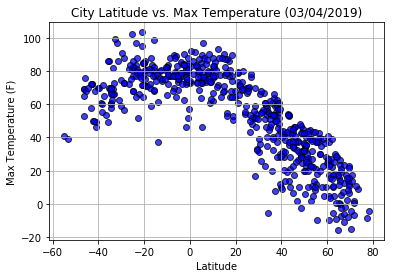

In [7]:
# Scatter plot for Latitude vs. Max Temperature Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Max Temp'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

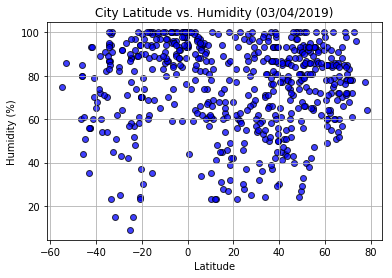

In [8]:
# Scatter plot for Latitude vs. Humidity Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Humidity'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

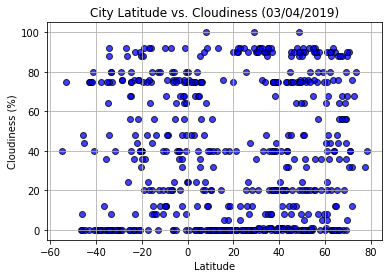

In [9]:
# Scatter plot for Latitude vs. Cloudiness Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Cloudiness'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

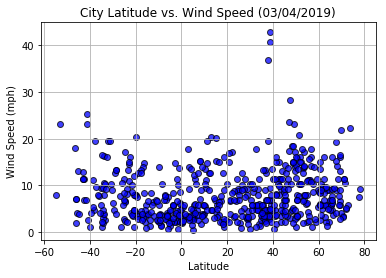

In [10]:
# Scatter plot for Latitude vs. Wind Speed Plot
plt.scatter(weather_df['Latitude'], 
            weather_df['Wind Speed'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.axis("tight")

# Save Figure
plt.savefig("../Images/Lat_vs_Wind.png")

# Show plot
plt.show()